In [2]:
import gradio as gr
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns


# Load dataset
iris = load_iris(as_frame=True)
X = iris.data
y = iris.target

/usr/local/python/3.12.1/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


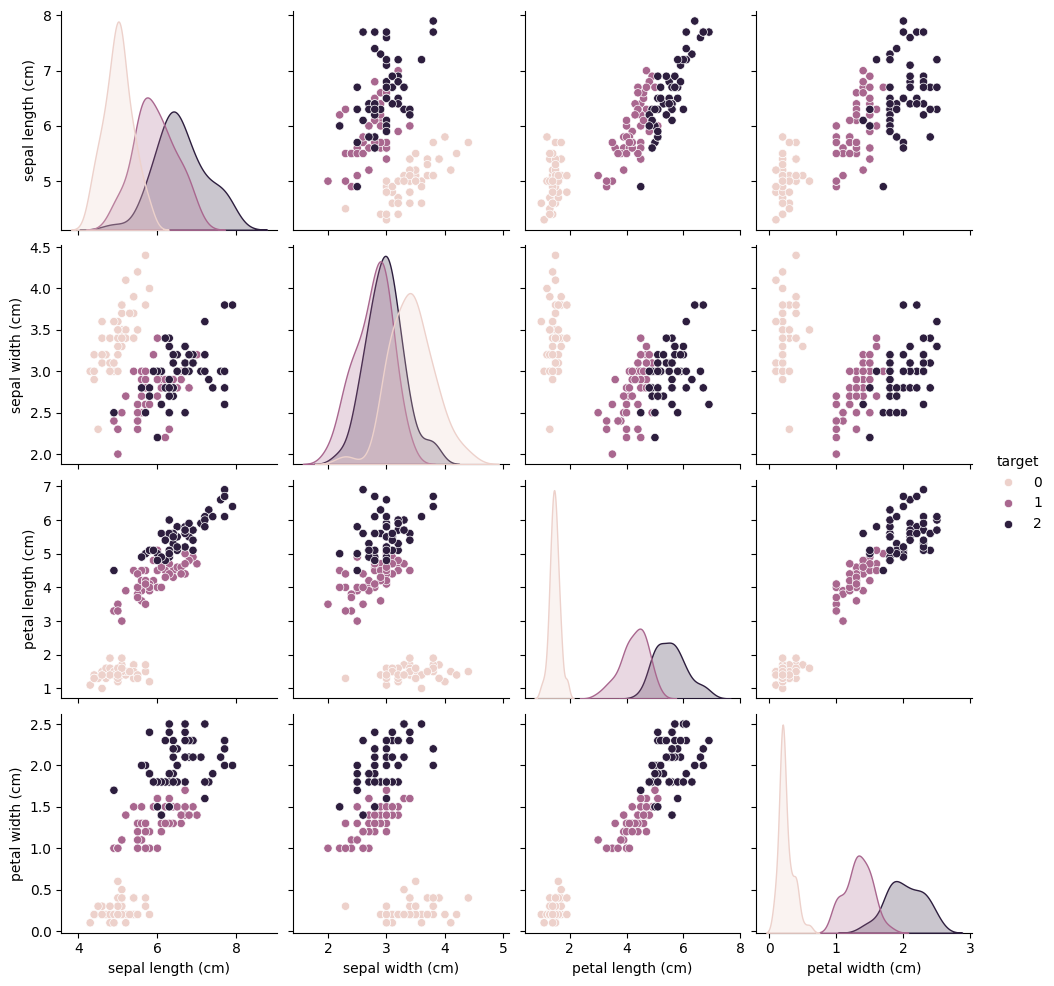

In [3]:
# Füge das neue Feature "flower_color" basierend auf der Iris-Art hinzu
def get_flower_color(target):
    if target == 0:
        return "Blue"  # Iris Setosa
    elif target == 1:
        return "Green"  # Iris Versicolor
    else:
        return "Red"  # Iris Virginica

# Füge die Blumenfarbe zum DataFrame hinzu
iris.frame["flower_color"] = iris.frame["target"].apply(get_flower_color)

# Visualisierung
_ = sns.pairplot(iris.frame, hue="target")

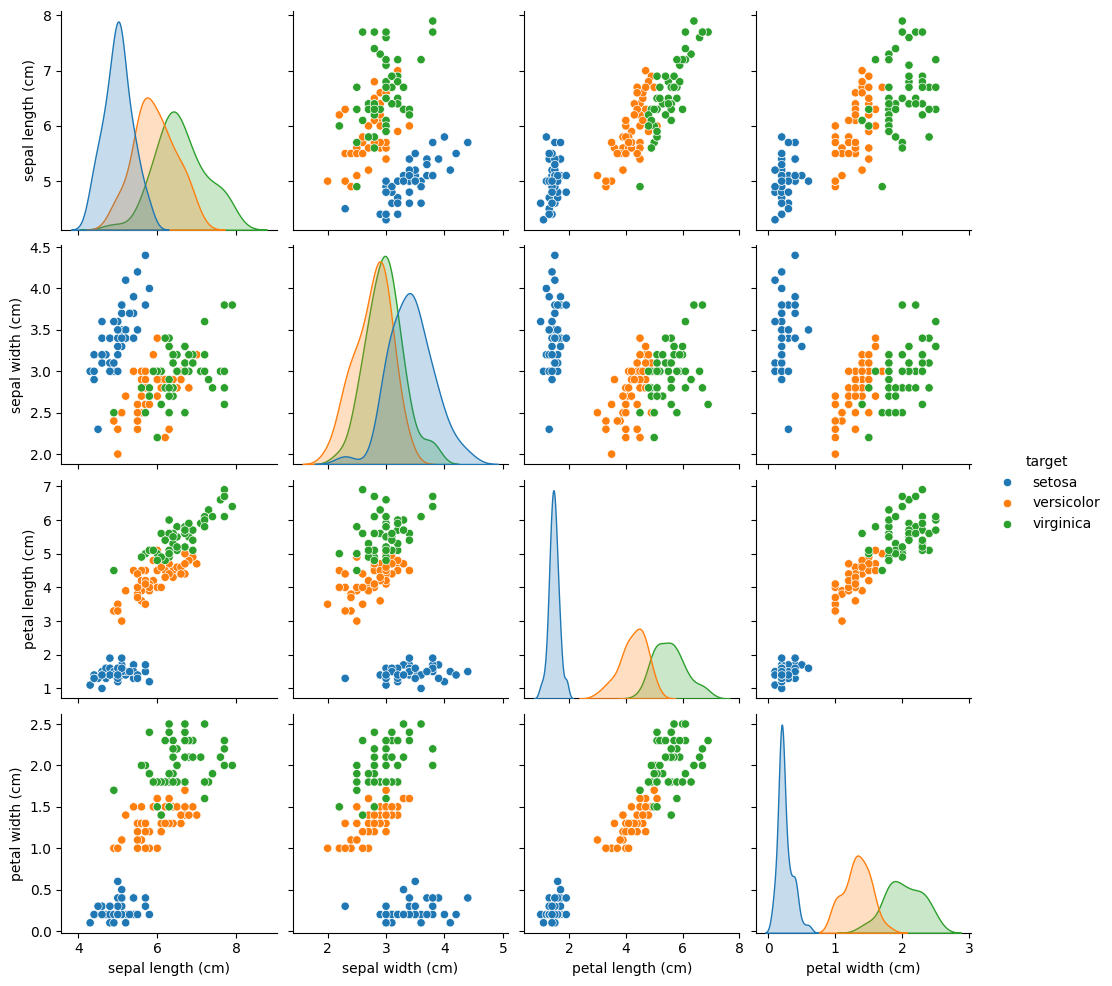

In [4]:

# Rename classes using the iris target names
iris.frame["target"] = iris.target_names[iris.target]
_ = sns.pairplot(iris.frame, hue="target")

In [5]:
# Train model with cross-validation
model = RandomForestClassifier(random_state=42)
cross_val_scores = cross_val_score(model, X, y, cv=5)
print(f"Cross-validation accuracy: {np.mean(cross_val_scores):.4f}")

# Train on the full dataset
model.fit(X, y)
train_accuracy = model.score(X, y)
print(f"Training accuracy: {train_accuracy:.4f}")

Cross-validation accuracy: 0.9667
Training accuracy: 1.0000


In [6]:

# Gradio UI for prediction
def predict(sepal_length, sepal_width, petal_length, petal_width):
    input_data = pd.DataFrame([[sepal_length, sepal_width, petal_length, petal_width]],
                              columns=iris.feature_names)
    prediction = model.predict(input_data)[0]
    flower_color = get_flower_color(prediction)  # Bestimme Blumenfarbe
    return iris.target_names[prediction], flower_color



In [7]:
predict(1, 2, 3, 4)

(np.str_('virginica'), 'Red')

In [8]:
# Create Gradio interface
demo = gr.Interface(
    fn=predict,
    inputs=[
        gr.Number(label="Sepal Length"),
        gr.Number(label="Sepal Width"),
        gr.Number(label="Petal Length"),
        gr.Number(label="Petal Width"),
    ],
    outputs=["text", "text"],
    examples=[
        [5.1, 3.5, 1.4, 0.2],
        [6.2, 2.9, 4.3, 1.3],
        [7.7, 3.8, 6.7, 2.2],
    ],
    title="Iris Flower Prediction",
    description="Enter the sepal and petal measurements to predict the Iris species."
)

demo.launch()


* Running on local URL:  http://127.0.0.1:7862

To create a public link, set `share=True` in `launch()`.


In [ ]:
# Create the Gradio interface
iface = gr.Interface(
    fn=predict_apartment,
    inputs=["number", "number", gr.Dropdown(choices=locations.keys(), label="Town", type="value")],
    outputs=[gr.Number()],
    examples=[[4.5, 120, "Dietlikon"], [3.5, 60, "Winterthur"]]
)

iface.launch()

NameError: name 'predict_apartment' is not defined

In [ ]:
# Create the Gradio interface
iface = gr.Interface(
    fn=predict_apartment,
    inputs=["number", "number", gr.Dropdown(choices=locations.keys(), label="Town", type="value")],
    outputs=[gr.Number()],
    examples=[[4.5, 120, "Dietlikon"], [3.5, 60, "Winterthur"]]
)

iface.launch()

* Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.


In [ ]:
import pickle

# save model to file
model_filename = "iris_random_forest_classifier.pkl"
with open(model_filename, mode="bw") as f:
    pickle.dump(model, file=f)